<a href="https://colab.research.google.com/github/ludovina-magalhaes/API_Tipo_Cambio/blob/main/API_tipo_cambio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### EXTRACCIÓN
Se están extrayendo los datos de la fuente: https://apilayer.com/marketplace/exchangerates_data-api?utm_source=apilayermarketplace&utm_medium=featured

### Problema a resolver:
Se busca investigar la evolución del dólar, el euro y la libra esterlina en el transcurso de 2024, con el fin de determinar los meses que experimenten las mayores fluctuaciones, independientemente de su signo.

In [ ]:
import requests
import pandas as pd
from google.colab import userdata

In [ ]:
api_key = userdata.get('api_key')
start_date = '2024-01-01'
end_date = '2025-01-01'
base = 'EUR'
symbols = 'USD,CHF,GBP'

url = f"https://api.apilayer.com/exchangerates_data/timeseries?start_date={start_date}&end_date={end_date}&base={base}&symbols={symbols}"


In [ ]:

payload = {}
headers= {
  "apikey": api_key
}

response = requests.request("GET", url, headers=headers, data = payload)

status_code = response.status_code
print(f"Status Code: {status_code}")
result = response.json()
print(result)
print(type(result))

Status Code: 200
{'success': True, 'timeseries': True, 'start_date': '2024-01-01', 'end_date': '2025-01-01', 'base': 'EUR', 'rates': {'2024-01-01': {'USD': 1.103769, 'CHF': 0.929318, 'GBP': 0.867209}, '2024-01-02': {'USD': 1.09414, 'CHF': 0.930232, 'GBP': 0.866822}, '2024-01-03': {'USD': 1.092657, 'CHF': 0.927779, 'GBP': 0.862162}, '2024-01-04': {'USD': 1.094685, 'CHF': 0.930702, 'GBP': 0.863088}, '2024-01-05': {'USD': 1.09547, 'CHF': 0.930825, 'GBP': 0.860787}, '2024-01-06': {'USD': 1.09547, 'CHF': 0.930869, 'GBP': 0.86088}, '2024-01-07': {'USD': 1.094182, 'CHF': 0.930941, 'GBP': 0.860486}, '2024-01-08': {'USD': 1.095048, 'CHF': 0.928711, 'GBP': 0.859301}, '2024-01-09': {'USD': 1.093129, 'CHF': 0.931838, 'GBP': 0.860047}, '2024-01-10': {'USD': 1.09746, 'CHF': 0.933607, 'GBP': 0.861127}, '2024-01-11': {'USD': 1.098123, 'CHF': 0.93458, 'GBP': 0.859451}, '2024-01-12': {'USD': 1.096246, 'CHF': 0.934725, 'GBP': 0.859868}, '2024-01-13': {'USD': 1.096246, 'CHF': 0.934725, 'GBP': 0.860071}, '

#### Construyendo una estructura en formato de tabla estructurada llamada DataFrame.

In [ ]:
df = pd.DataFrame.from_dict(result['rates'], orient='index').reset_index()
df

,index,USD,CHF,GBP
0,2024-01-01,1.103769,0.929318,0.867209
1,2024-01-02,1.094140,0.930232,0.866822
2,2024-01-03,1.092657,0.927779,0.862162
3,2024-01-04,1.094685,0.930702,0.863088
4,2024-01-05,1.095470,0.930825,0.860787
...,...,...,...,...
362,2024-12-28,1.042857,0.940828,0.829508
363,2024-12-29,1.042900,0.940595,0.829133
364,2024-12-30,1.040566,0.939954,0.829253
365,2024-12-31,1.040566,0.939954,0.829253


In [ ]:

df.describe()

,USD,CHF,GBP
count,367.000000,367.000000,367.000000
mean,1.082182,0.952946,0.846910
std,0.018011,0.017803,0.010501
min,1.034988,0.927403,0.823019
25%,1.073237,0.937700,0.838078
50%,1.083911,0.948289,0.848743
75%,1.092239,0.969196,0.855795
max,1.120762,1.000585,0.867209


In [ ]:

df.nunique()

,0
index,367
USD,308
CHF,357
GBP,349


In [ ]:
df.isnull().sum().sum()

np.int64(0)

#### Carga de datos en Drive

**Almacenando en formato CSV en Drive, que actuará como nuestro data lake.**

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/API_KDD/cambio.csv', index=False)

In [ ]:

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# Crear una nueva hoja de cálculo en Google Sheets.
spreadsheet_name = "cambio_sheets"
spreadsheet = gc.create(spreadsheet_name)

In [ ]:

sheet = gc.open(spreadsheet_name).sheet1

# Upload del Dataframe a la hoja de cálculo creada.
set_with_dataframe(sheet, df)

print(f"Datos guardados con éxito en la hoja de cálculo: {spreadsheet_name}")

Datos guardados con éxito en la hoja de cálculo: cambio_sheets


**Verificando el archivo creado.**

In [ ]:
import pandas as pd

# Obtener todos los datos de la hoja de cálculo
rows = sheet.get_all_values()

# Convertir a DataFrame
headers = rows[0]  # Encabezados
values = rows[1:]  # Datos

df_nuevo = pd.DataFrame(values, columns=headers)
print(df_nuevo)

          index       USD       CHF       GBP
0    2024-01-01  1,103769  0,929318  0,867209
1    2024-01-02   1,09414  0,930232  0,866822
2    2024-01-03  1,092657  0,927779  0,862162
3    2024-01-04  1,094685  0,930702  0,863088
4    2024-01-05   1,09547  0,930825  0,860787
..          ...       ...       ...       ...
362  2024-12-28  1,042857  0,940828  0,829508
363  2024-12-29    1,0429  0,940595  0,829133
364  2024-12-30  1,040566  0,939954  0,829253
365  2024-12-31  1,040566  0,939954  0,829253
366  2025-01-01  1,035138  0,939708  0,826894

[367 rows x 4 columns]


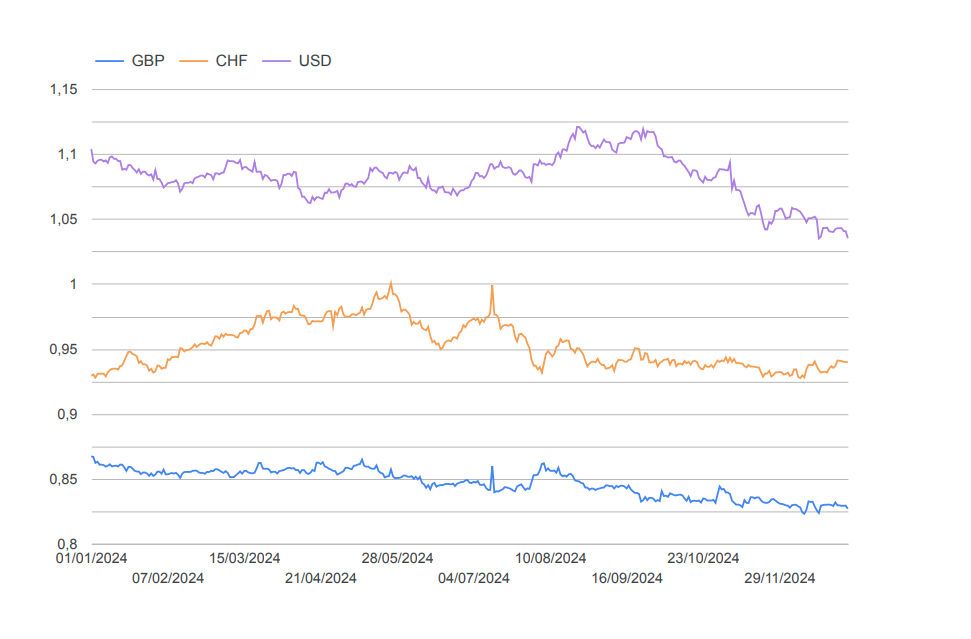

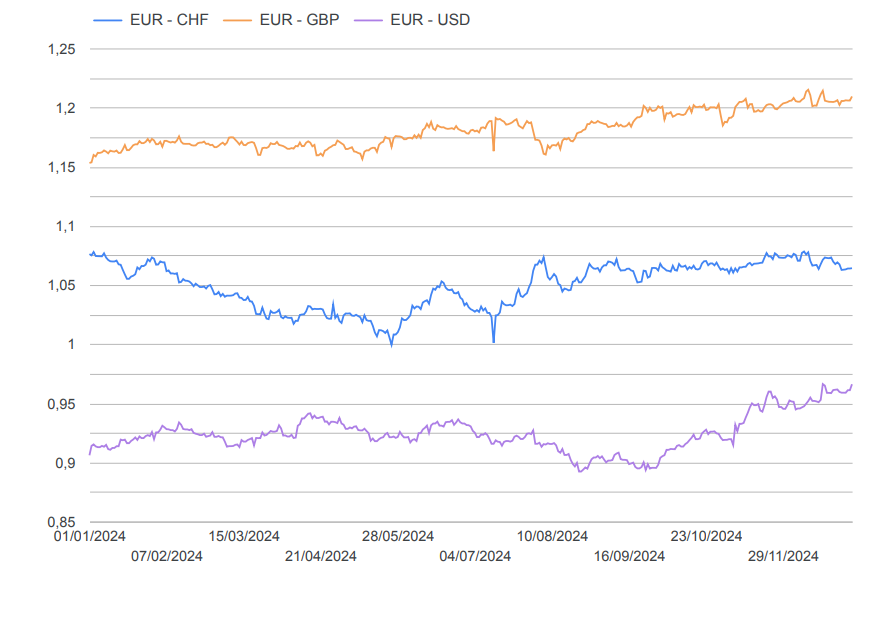